# FYSS5120 Efficient Numerical Programming - Demo 4

Author: Felix Cahyadi

Creation date: 02.10.2023

Last changes: -

### 1. Examine the MNIST hand-written number recognition routine from Tensorflow/Keras examples. There are two versions, we’ll look at https://keras.io/examples/vision/mnist_convnet with Convolution, MaxPooling, Flatten, Dropout, and Dense layers. A slightly modified code (added plotting etc.) is in the file keras_mnist.py

I have checked the code, and the keras_mnist.py has the same steps as the one in the website, hence we are going to analyze only the keras_mnist.py

In [1]:
"""
 Trains a simple convnet on the MNIST dataset.
 https://keras.io/examples/vision/mnist_convnet/

"""

# Silence tensorflow import verbose messages
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


# Setup
# -----
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
# Plotting
# --------

def plot_images(title,images,labels,findings=None):
    """
    title: title of the whole 5x5 plot
    images: set of images to plot, first 25 picked
    labels: set of digits the images are showing
    findings (optional): set of digits the NN thinks he images are showing
    """
    fig,axs = plt.subplots(5,5,figsize=(8,8))
    plt.suptitle(title)
    k = 0
    for i in range(5):
        for j in range(5):
            axs[i,j].axis('off')
            try:
                axs[i,j].imshow(images[k], cmap='Greys')
                
                try:
                    axs[i,j].set_title(f'{labels[k]} not {findings[k]}')
                except:
                    axs[i,j].set_title(f'{labels[k]}')
                k+=1
            except:
                pass
                
    plt.ion()   
    plt.draw()
    plt.pause(1e-3)
    plt.ioff()

In [3]:
# Model / data parameters
# -----------------------
num_classes = 10
input_shape = (28, 28, 1)

11490434/11490434 [==============================] - 11s 1us/step


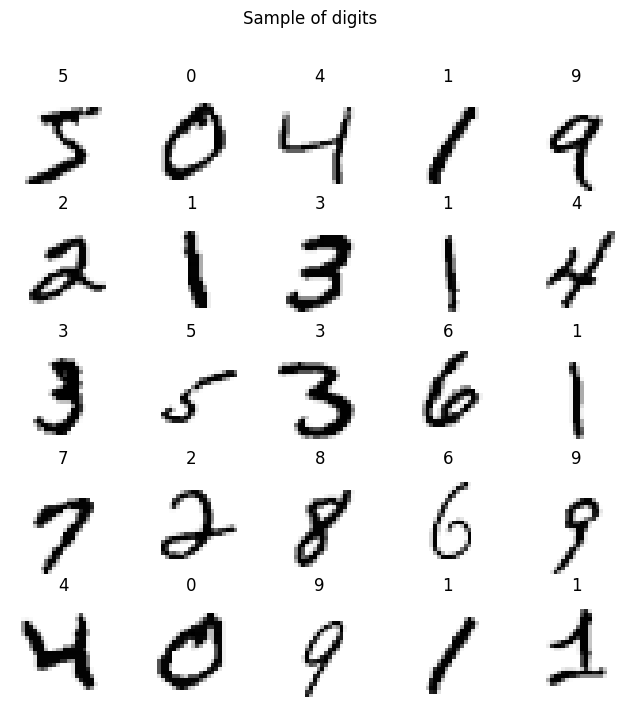

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
# Read in the data
# ----------------
# split between train and test sets
#
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
plot_images('Sample of digits',x_train,y_train)

# Scale images to the [0, 1] range
x_train = x_train/255
x_test = x_test/255

# x shape is (:,28,28), need (:,28,28,1); add an extra dimension to the end
# images should  have shape (28, 28, 1)
x_train = x_train[...,np.newaxis] # notice the use of the ellipsis ...
x_test = x_test[...,np.newaxis]

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
# Build the model
# ---------------
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [6]:
# Train the model
# ---------------
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 29s 66ms/step - loss: 0.3828 - accuracy: 0.8854 - val_loss: 0.0843 - val_accuracy: 0.9748
Epoch 2/15
422/422 [==============================] - 28s 67ms/step - loss: 0.1147 - accuracy: 0.9640 - val_loss: 0.0602 - val_accuracy: 0.9832
Epoch 3/15
422/422 [==============================] - 28s 67ms/step - loss: 0.0882 - accuracy: 0.9729 - val_loss: 0.0502 - val_accuracy: 0.9872
Epoch 4/15
422/422 [==============================] - 26s 62ms/step - loss: 0.0744 - accuracy: 0.9768 - val_loss: 0.0443 - val_accuracy: 0.9885
Epoch 5/15
422/422 [==============================] - 27s 64ms/step - loss: 0.0654 - accuracy: 0.9796 - val_loss: 0.0418 - val_accuracy: 0.9898
Epoch 6/15
422/422 [==============================] - 26s 63ms/step - loss: 0.0585 - accuracy: 0.9816 - val_loss: 0.0375 - val_accuracy: 0.9900
Epoch 7/15
422/422 [==============================] - 28s 65ms/step - loss: 0.0522 - accuracy: 0.9837 - val_loss: 0.0332 - val_accuracy:

In [7]:
# Evaluate the trained model
# --------------------------
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.023796111345291138
Test accuracy: 0.9921000003814697


### 2. What’s the purpose of these layer types?
* Convolution
* Flatten

In [ ]:
# Create a function to plot a single image


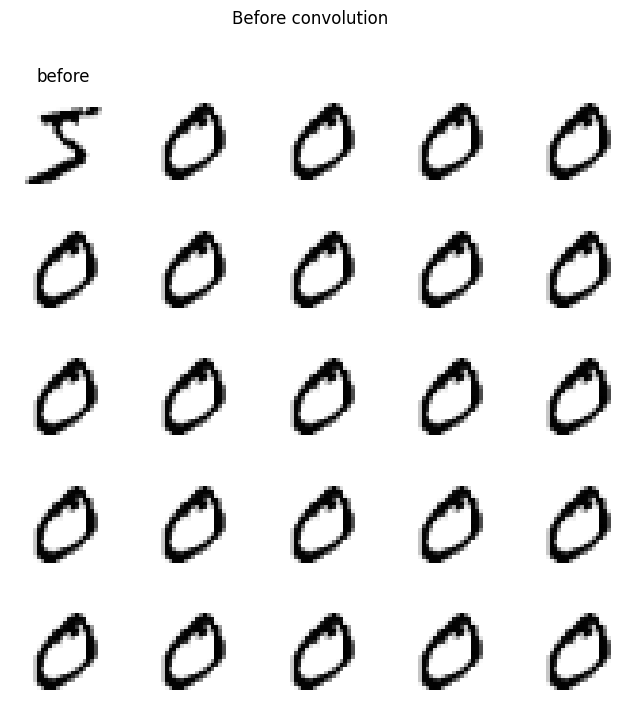

In [14]:
# we are going to test what the layers are doing
x_sample = x_train[:1] # Take the first sample from training data
plot_images('Before convolution',x_train,labels=['before'])